# Model Inversion using Search

## Setup

In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from config import MODELS, DTYPE
from privacy_and_grokking.utils import get_device
from privacy_and_grokking.path_keeper import get_path_keeper

In [2]:
device = get_device()
pk = get_path_keeper()
mu = torch.tensor([0.1307], device=device)
std = torch.tensor([0.3081], device=device)

## Attack

Note: This can take a lot of runs to produce something meaningful.

In [ ]:
TARGET_CLASS_IDX = 3
INPUT_SIZE = 28
SCALES = [14, 21, INPUT_SIZE] 
STEPS_PER_SCALE = 5000

Scale 14 | Step 0 | Loss 0.9180 | Prob 0.1003
Scale 14 | Step 500 | Loss 0.0051 | Prob 0.2312
Scale 14 | Step 1000 | Loss 0.0047 | Prob 0.2312
Scale 14 | Step 1500 | Loss 0.0043 | Prob 0.2311
Scale 14 | Step 2000 | Loss 0.0040 | Prob 0.2312
Scale 14 | Step 2500 | Loss 0.0038 | Prob 0.2312
Scale 14 | Step 3000 | Loss 0.0037 | Prob 0.2312
Scale 14 | Step 3500 | Loss 0.0036 | Prob 0.2313
Scale 14 | Step 4000 | Loss 0.0035 | Prob 0.2312
Scale 14 | Step 4500 | Loss 0.0034 | Prob 0.2312
Scale 21 | Step 0 | Loss 0.0351 | Prob 0.2002
Scale 21 | Step 500 | Loss 0.0028 | Prob 0.2314
Scale 21 | Step 1000 | Loss 0.0025 | Prob 0.2316
Scale 21 | Step 1500 | Loss 0.0025 | Prob 0.2314
Scale 21 | Step 2000 | Loss 0.0025 | Prob 0.2316
Scale 21 | Step 2500 | Loss 0.0025 | Prob 0.2313
Scale 21 | Step 3000 | Loss 0.0025 | Prob 0.2315
Scale 21 | Step 3500 | Loss 0.0024 | Prob 0.2314
Scale 21 | Step 4000 | Loss 0.0024 | Prob 0.2316
Scale 21 | Step 4500 | Loss 0.0024 | Prob 0.2316
Scale 28 | Step 0 | Loss 0.0

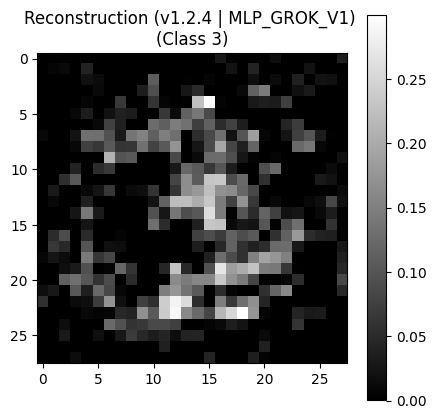

Scale 14 | Step 0 | Loss 0.8518 | Prob 0.1035
Scale 14 | Step 500 | Loss 0.0080 | Prob 0.2201
Scale 14 | Step 1000 | Loss 0.0047 | Prob 0.2255
Scale 14 | Step 1500 | Loss 0.0037 | Prob 0.2277
Scale 14 | Step 2000 | Loss 0.0030 | Prob 0.2292
Scale 14 | Step 2500 | Loss 0.0027 | Prob 0.2299
Scale 14 | Step 3000 | Loss 0.0025 | Prob 0.2303
Scale 14 | Step 3500 | Loss 0.0023 | Prob 0.2306
Scale 14 | Step 4000 | Loss 0.0022 | Prob 0.2308
Scale 14 | Step 4500 | Loss 0.0021 | Prob 0.2315
Scale 21 | Step 0 | Loss 0.0393 | Prob 0.1977
Scale 21 | Step 500 | Loss 0.0018 | Prob 0.2318
Scale 21 | Step 1000 | Loss 0.0017 | Prob 0.2316
Scale 21 | Step 1500 | Loss 0.0016 | Prob 0.2316
Scale 21 | Step 2000 | Loss 0.0016 | Prob 0.2318
Scale 21 | Step 2500 | Loss 0.0016 | Prob 0.2322
Scale 21 | Step 3000 | Loss 0.0016 | Prob 0.2327
Scale 21 | Step 3500 | Loss 0.0016 | Prob 0.2315
Scale 21 | Step 4000 | Loss 0.0016 | Prob 0.2323
Scale 21 | Step 4500 | Loss 0.0016 | Prob 0.2319
Scale 28 | Step 0 | Loss 0.0

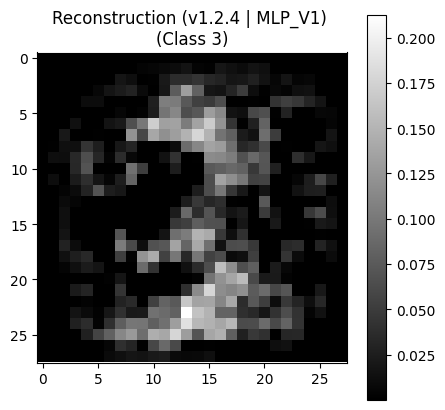

Scale 14 | Step 0 | Loss 1.2693 | Prob 0.0900
Scale 14 | Step 500 | Loss 0.0133 | Prob 0.2317
Scale 14 | Step 1000 | Loss 0.0110 | Prob 0.2317
Scale 14 | Step 1500 | Loss 0.0093 | Prob 0.2316
Scale 14 | Step 2000 | Loss 0.0079 | Prob 0.2317
Scale 14 | Step 2500 | Loss 0.0069 | Prob 0.2317
Scale 14 | Step 3000 | Loss 0.0061 | Prob 0.2317
Scale 14 | Step 3500 | Loss 0.0055 | Prob 0.2317
Scale 14 | Step 4000 | Loss 0.0050 | Prob 0.2317
Scale 14 | Step 4500 | Loss 0.0047 | Prob 0.2318
Scale 21 | Step 0 | Loss 0.2139 | Prob 0.1655
Scale 21 | Step 500 | Loss 0.0043 | Prob 0.2318
Scale 21 | Step 1000 | Loss 0.0040 | Prob 0.2318
Scale 21 | Step 1500 | Loss 0.0037 | Prob 0.2318
Scale 21 | Step 2000 | Loss 0.0035 | Prob 0.2318
Scale 21 | Step 2500 | Loss 0.0033 | Prob 0.2318
Scale 21 | Step 3000 | Loss 0.0031 | Prob 0.2318
Scale 21 | Step 3500 | Loss 0.0029 | Prob 0.2318
Scale 21 | Step 4000 | Loss 0.0027 | Prob 0.2317
Scale 21 | Step 4500 | Loss 0.0027 | Prob 0.2320
Scale 28 | Step 0 | Loss 0.0

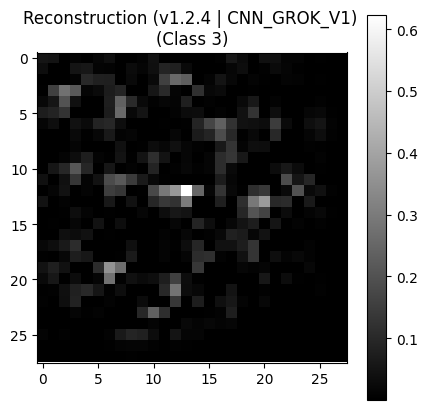

Scale 14 | Step 0 | Loss 0.5583 | Prob 0.1301
Scale 14 | Step 500 | Loss 0.0131 | Prob 0.2259
Scale 14 | Step 1000 | Loss 0.0095 | Prob 0.2287
Scale 14 | Step 1500 | Loss 0.0075 | Prob 0.2284
Scale 14 | Step 2000 | Loss 0.0060 | Prob 0.2291
Scale 14 | Step 2500 | Loss 0.0048 | Prob 0.2299
Scale 14 | Step 3000 | Loss 0.0039 | Prob 0.2297
Scale 14 | Step 3500 | Loss 0.0033 | Prob 0.2301
Scale 14 | Step 4000 | Loss 0.0029 | Prob 0.2307
Scale 14 | Step 4500 | Loss 0.0026 | Prob 0.2304
Scale 21 | Step 0 | Loss 0.0997 | Prob 0.1808
Scale 21 | Step 500 | Loss 0.0022 | Prob 0.2304
Scale 21 | Step 1000 | Loss 0.0020 | Prob 0.2304
Scale 21 | Step 1500 | Loss 0.0019 | Prob 0.2305
Scale 21 | Step 2000 | Loss 0.0018 | Prob 0.2304
Scale 21 | Step 2500 | Loss 0.0017 | Prob 0.2305
Scale 21 | Step 3000 | Loss 0.0017 | Prob 0.2302
Scale 21 | Step 3500 | Loss 0.0016 | Prob 0.2302
Scale 21 | Step 4000 | Loss 0.0016 | Prob 0.2302
Scale 21 | Step 4500 | Loss 0.0016 | Prob 0.2303
Scale 28 | Step 0 | Loss 0.0

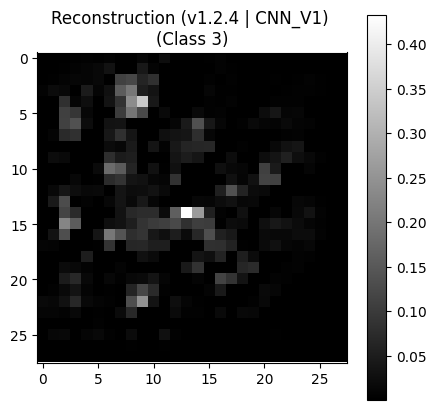

In [16]:
for model in MODELS:
    pk.set_params({"run_id": model.id, "model": model.name, "step": model.updates[-1]})

    target_model = model.model_class()
    target_model.load_state_dict(torch.load(pk.MODEL_TORCH, weights_only=True, map_location=device))
    target_model.to(device)
    target_model.eval()
    for param in target_model.parameters():
        param.requires_grad = False

    start_size = SCALES[0]
    raw_input = torch.randn((1, 1, start_size, start_size), device=device, dtype=DTYPE) * 0.1
    raw_input.requires_grad = True

    target_vector = torch.zeros(1, 10, device=device)
    target_vector[0, TARGET_CLASS_IDX] = 1.0

    for scale in SCALES:
        if raw_input.shape[-1] != scale:
            with torch.no_grad():
                new_data = F.interpolate(raw_input, size=(scale, scale), mode='bilinear', align_corners=False)
                raw_input = new_data.detach()
                raw_input.requires_grad = True
        
        optimizer = optim.Adam([raw_input], lr=0.05)
        for step in range(STEPS_PER_SCALE):
            optimizer.zero_grad()

            if scale != INPUT_SIZE:
                model_input_raw = F.interpolate(raw_input, size=(INPUT_SIZE, INPUT_SIZE), mode='bilinear', align_corners=False)
            else:
                model_input_raw = raw_input

            image = torch.sigmoid(model_input_raw)
            norm_input = (image - mu) / std
            output = target_model(norm_input)
            mse_loss = ((output - target_vector)**2).sum()
            
            # TV Loss
            diff_h = torch.mean((image[:, :, 1:, :] - image[:, :, :-1, :])**2)
            diff_w = torch.mean((image[:, :, :, 1:] - image[:, :, :, :-1])**2)
            tv_loss = diff_h + diff_w
            
            # L2 Decay
            l2_loss = torch.norm(image)
            
            loss = mse_loss + (0.05 * tv_loss) + (0.001 * l2_loss)
            
            loss.backward()
            optimizer.step()
            
            if step % 500 == 0:
                prob = torch.softmax(output, dim=1)[0, TARGET_CLASS_IDX].item()
                print(f"Scale {scale} | Step {step} | Loss {loss.item():.4f} | Prob {prob:.4f}")

    final_image = torch.sigmoid(F.interpolate(raw_input, size=(INPUT_SIZE, INPUT_SIZE), mode='bilinear')).detach().cpu().squeeze()

    plt.figure(figsize=(5, 5))
    plt.imshow(final_image, cmap='gray')
    plt.title("Reconstruction ({} | {}) \n(Class {})".format(model.id, model.name, TARGET_CLASS_IDX))
    plt.colorbar()
    plt.show()